## EDA 

### STUDENT PERFORMANCE INDECTATOR

#### Life cycle of machine learning project

- Understanding the problem statement
- Data collection
- Data check to perform
- Explority Data Analysis
- Data preprocessing
- Model Training
- Select best model

1) Understanding the problem statement

this dataset on the student performance(test score) prediction based on differance parameter like score, male or female, avg score

2) Data collection

Data is collected on kaggle

2.1 import required depedencies 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

2.2) load dataset

In [2]:
df = pd.read_csv('./Dataset/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


3) Data Checks to perform
- check missing value
- check duplicate value
- check datatype
- check unique value in each column
- check statistic for dataset
- check verious catogary in every columns

3.1) check missing value

In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Insite 

there is no missing value in every colums

3.2) check duplicate

In [5]:
print(df.duplicated().sum())

0


there is no any duplicate value

3.3 check datatype

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


there is in 3 numeric and 5 categarical value

3.4 check unique value in each columns

In [7]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

there is in each columns many unique values

3.5 check statistic value 

In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In  this dataset 1000 records 

All colums have mean value above 65

3.6 check various categary in each columns

In [9]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [10]:
print('Catagories in "gender" variables:  ',end=' ')
print(df['gender'].unique())

print('\nCatagories in "race/ethnicity" variables:  ',end=' ')
print(df['race/ethnicity'].unique())

print('\nCatagories in "parental level of education" variables:  ',end=' ')
print(df['parental level of education'].unique())

print('\nCatagories in "lunch" variables: ',end=' ')
print(df['lunch'].unique())

print('\nCatagories in "test preparation course" variables: ',end=' ')
print(df['test preparation course'].unique())


Catagories in "gender" variables:   ['female' 'male']

Catagories in "race/ethnicity" variables:   ['group B' 'group C' 'group A' 'group D' 'group E']

Catagories in "parental level of education" variables:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Catagories in "lunch" variables:  ['standard' 'free/reduced']

Catagories in "test preparation course" variables:  ['none' 'completed']


In [11]:
# define numeric and catagorical feature
num_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

print("We have {} numeric feature {}".format(len(num_feature),num_feature))
print("We have {} catagorical feature {}".format(len(cat_feature),cat_feature))

We have 3 numeric feature ['math score', 'reading score', 'writing score']
We have 5 catagorical feature ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


3.8 Adding columns total score and avg score

In [14]:
df['total score'] = df['math score'] + df['writing score'] + df['reading score']
df['average score'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [19]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total score', 'average score'],
      dtype='object')

### 4) Exploring Data

#### Histogram & KDE

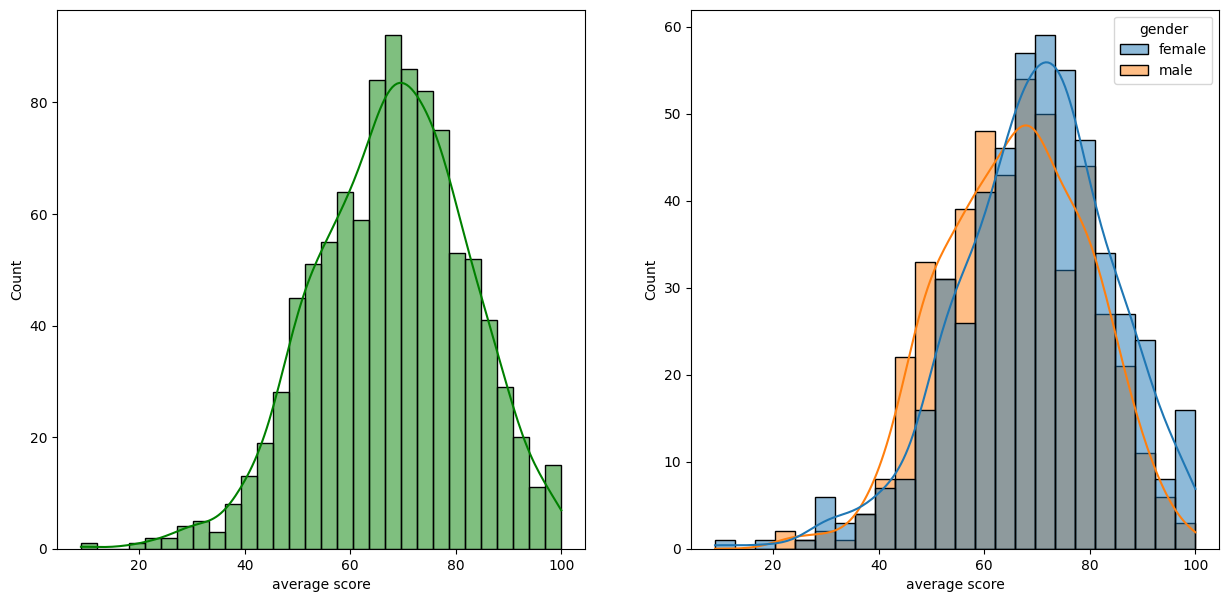

In [20]:
# avg score who is well performed
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average score',bins=30,kde=True,color='g')


plt.subplot(122)
sns.histplot(data=df,x='average score',kde=True,hue='gender')
plt.show()

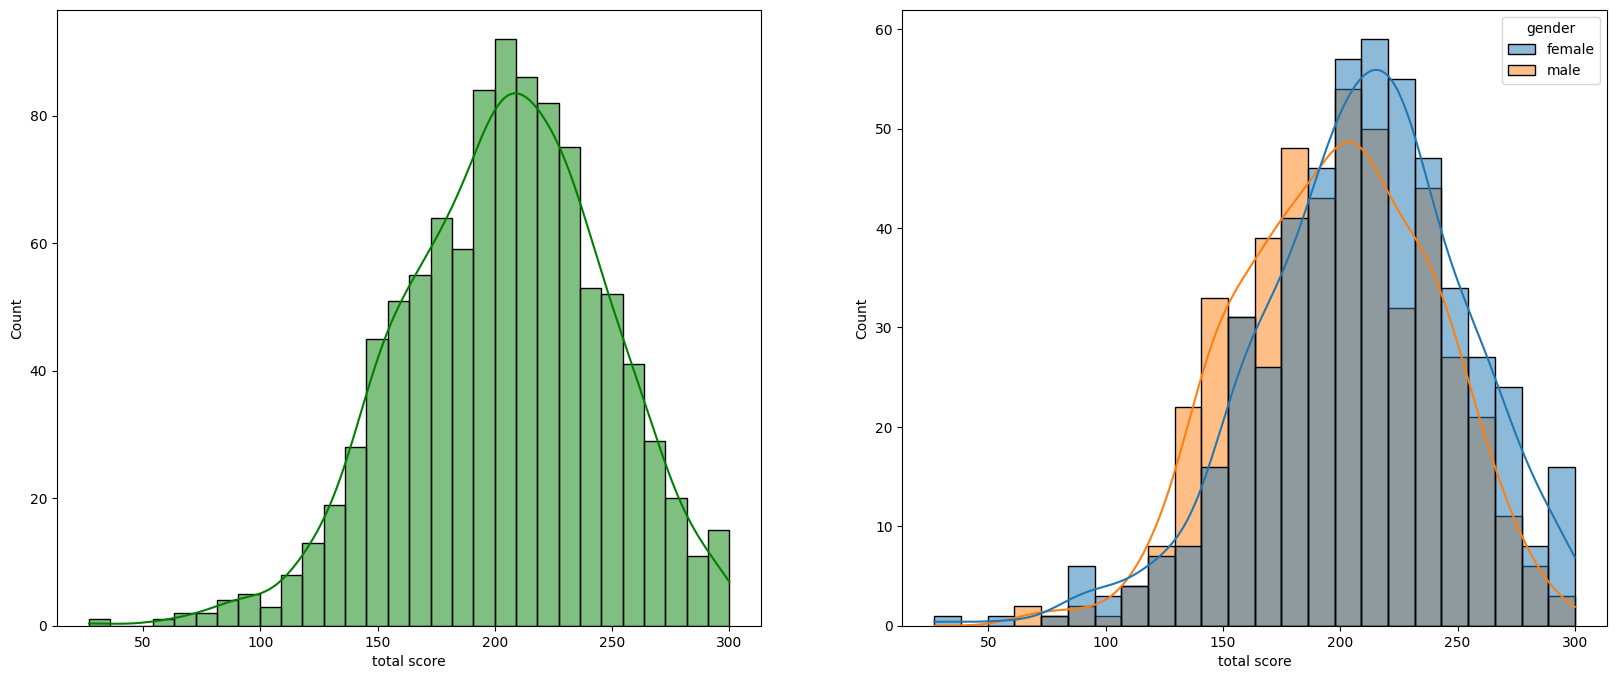

In [22]:
plt.figure(figsize=(20,8))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30, kde=True,color='g')

plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

### Insight
thare are girls perfom better then boys

## How test preperation course on avg score

In [27]:
print(df.groupby('test preparation course')['average score'].describe())

                         count       mean        std        min        25%  \
test preparation course                                                      
completed                358.0  72.669460  13.036960  34.333333  65.000000   
none                     642.0  65.038941  14.186707   9.000000  55.416667   

                               50%        75%    max  
test preparation course                               
completed                73.500000  82.166667  100.0  
none                     65.333333  75.000000  100.0  


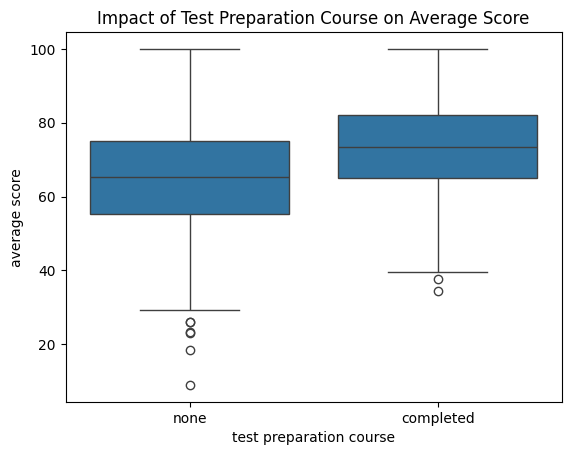

In [29]:
sns.boxplot(data=df,x='test preparation course',y='average score')
plt.title("Impact of Test Preparation Course on Average Score")
plt.show()

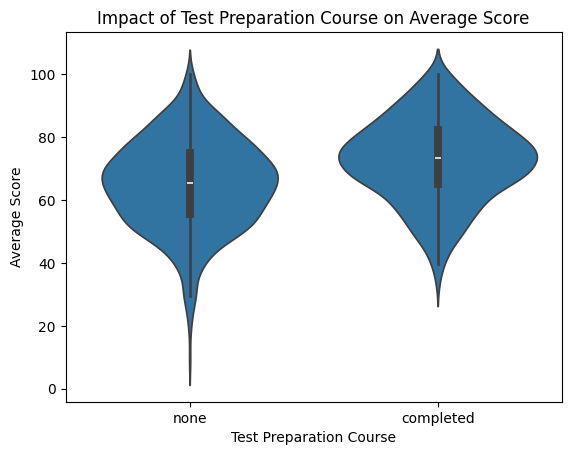

In [30]:
sns.violinplot(x='test preparation course', y='average score', data=df)
plt.title("Impact of Test Preparation Course on Average Score")
plt.xlabel("Test Preparation Course")
plt.ylabel("Average Score")
plt.show()


there is is any persion compleate test preperaction course then it perform well then other

## FInding corelationship between numeric feature

In [34]:
df[num_feature].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


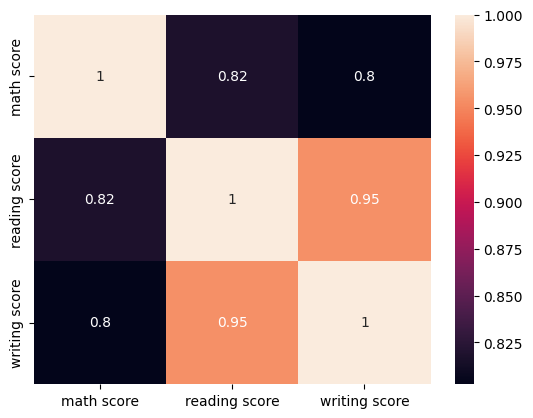

In [45]:
corr_metix = df[num_feature].corr()
sns.heatmap(data=corr_metix,annot=True)
plt.show()

In [46]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


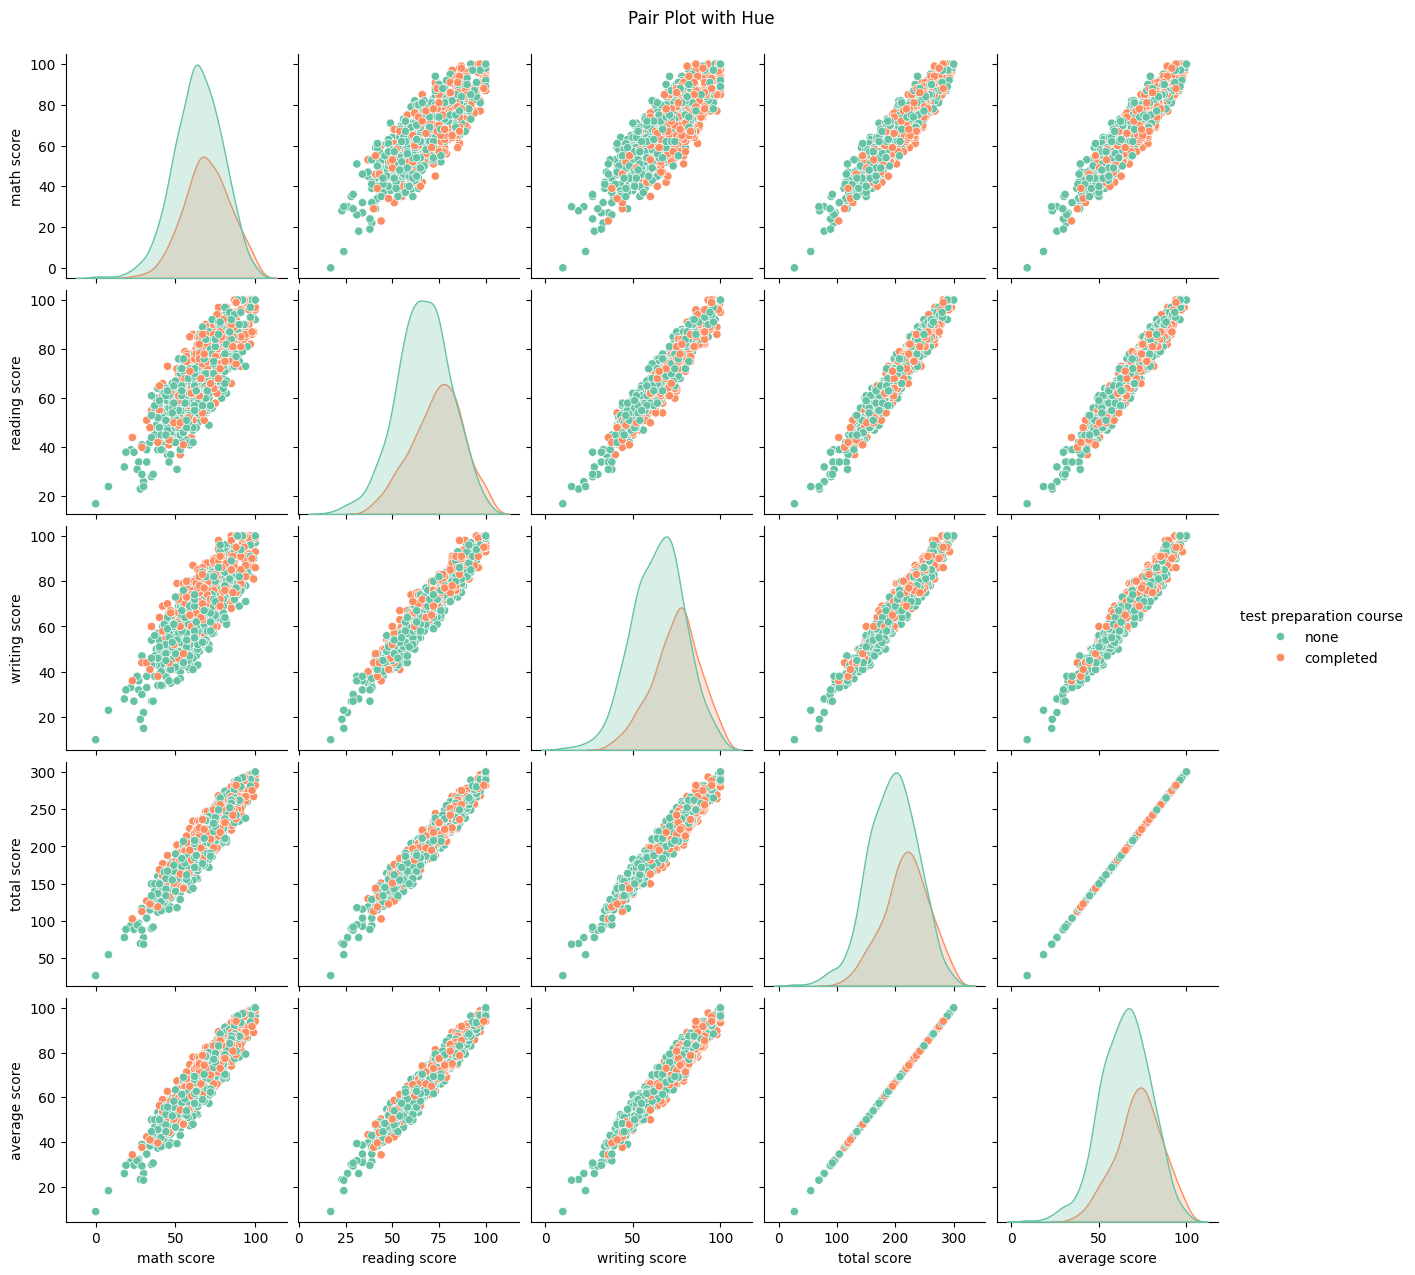

In [47]:
sns.pairplot(df, hue='test preparation course', diag_kind='kde', palette='Set2')
plt.suptitle("Pair Plot with Hue", y=1.02)
plt.show()

In [48]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
